In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
alto, ancho = 60, 60
lote = 20

datosEntrenamiento = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/frutas/entrenamiento",
    image_size = (alto, ancho),
    batch_size = lote
)
datosValidacion = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/frutas/validacion",
    image_size = (alto, ancho),
    batch_size = lote
)
datosPrueba = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/frutas/prueba",
    image_size = (alto, ancho),
    batch_size = lote
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


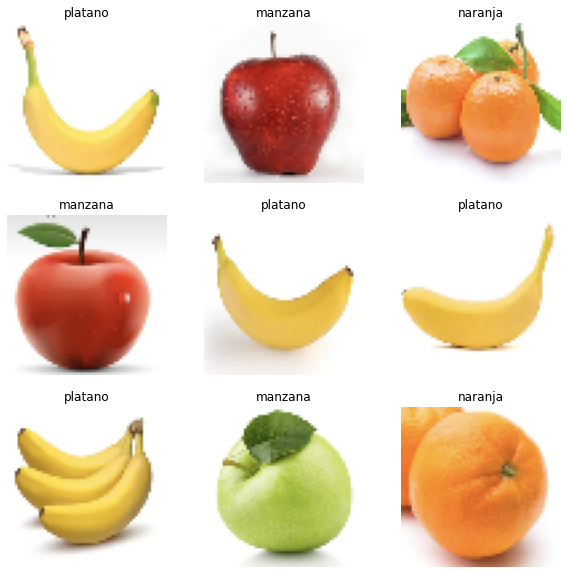

In [ ]:
nombreClases = ["manzana", "naranja", "platano"]
plt.figure(figsize=(10,10))
for images, labels in datosEntrenamiento.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(nombreClases[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(60, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(60, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(60, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    datosEntrenamiento,
    validation_data = datosValidacion,
    epochs = 15
)

Epoch 1/15
23/23 [==============================] - 53s 2s/step - loss: 1.0434 - accuracy: 0.4522 - val_loss: 0.8689 - val_accuracy: 0.4697
Epoch 2/15
23/23 [==============================] - 3s 91ms/step - loss: 0.6609 - accuracy: 0.7130 - val_loss: 0.5093 - val_accuracy: 0.8485
Epoch 3/15
23/23 [==============================] - 3s 84ms/step - loss: 0.4229 - accuracy: 0.8283 - val_loss: 0.4694 - val_accuracy: 0.7879
Epoch 4/15
23/23 [==============================] - 2s 64ms/step - loss: 0.2518 - accuracy: 0.9109 - val_loss: 0.1392 - val_accuracy: 0.9545
Epoch 5/15
23/23 [==============================] - 4s 110ms/step - loss: 0.2279 - accuracy: 0.9196 - val_loss: 0.1553 - val_accuracy: 0.9394
Epoch 6/15
23/23 [==============================] - 2s 64ms/step - loss: 0.1536 - accuracy: 0.9500 - val_loss: 0.2496 - val_accuracy: 0.8485
Epoch 7/15
23/23 [==============================] - 2s 65ms/step - loss: 0.1545 - accuracy: 0.9543 - val_loss: 0.1811 - val_accuracy: 0.9242
Epoch 8/15
23

In [ ]:
model.evaluate(datosPrueba)

7/7 [==============================] - 20s 15ms/step - loss: 0.1265 - accuracy: 0.9615


[0.12645868957042694, 0.9615384340286255]

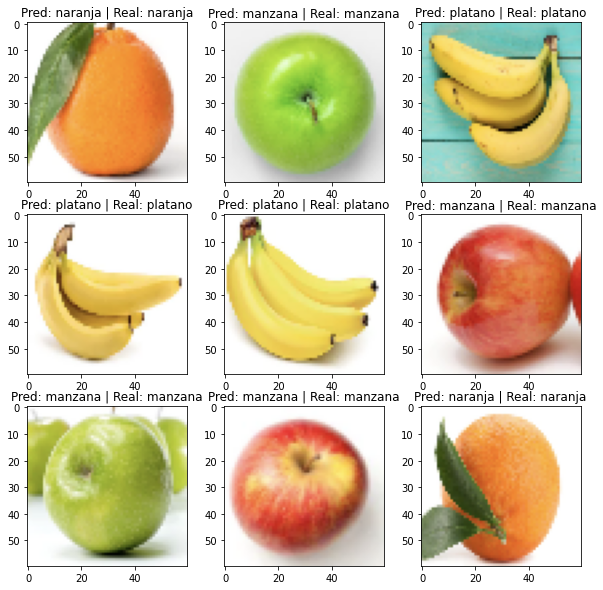

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in datosPrueba.take(1):
  classifications = model(images)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + nombreClases[index] + " | Real: " + nombreClases[labels[i]])

In [ ]:
convertir = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = convertir.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)